# Module 4: Data Wrangling (part2)

## <font color='firebrick'>  Introduction
    
Previously, in module 3, we started learning about data wrangling, and in particular we looked at how we can **select** and **filter** data. 
    
In this module, we will continue with data wrangling, and learn how we can **arrange**, **group**, **summarize**, and **mutate** data. 
    
In addition, we will learn how customize `seaborn` plots for communication purposes. 

In [1]:
# import necessary packages for this module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot") #ggplot2 is a powerful data visualization package in R

In [3]:
# read the sales.csv dataset and save in a variable called sales

sales = pd.read_csv("sales.csv")
sales.head(3)


,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210


**Sources:** 

- Data Science for Marketing Analytics, by Tommy Blanchard, Debasish Behera, and Pranshu Bhatnagar. Packt Publishing, 2019.
- https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99
- https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby
- https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231
- https://www.geeksforgeeks.org/python-map-function/
- https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/
- https://www.textbook.ds100.org/intro.html
- https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5


### Outline


**Learning Objectives**

- Aggregate `pandas` `DataFrames`
- Mutate `pandas` `DataFrames` 
- Arrange `pandas` `DataFrames`
- Customize Seaborn plots

## <font color='firebrick'>  1. Arranging Data


#### 1.1 Arranging dataframes based on 1 variable

In [9]:
## What sales data has the 3 highest gross profit in 2004?

# Gross profit is the profit a company makes after deducting the 
# costs associated with making and selling its products, or the costs
# associated with providing its services. Gross profit will appear 
# on a company's income statement and can be calculated by subtracting 
# the cost of goods sold (COGS) from revenue (sales). 
# https://www.investopedia.com/terms/g/grossprofit.asp


sales04 = sales.loc[sales['Year'] == 2004]
sorted_sales04 = sales04.sort_values(by = 'Gross profit',ascending = False)
sorted_sales04.head(3)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.00,436595.23,6.51
12453,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.42,7.00,407650.30,6.51
9271,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.00,265.14,374923.56,246.58


In [10]:
# OR

# we can chain the operations we want to perform on our datafram
# using the . notation

# In the following line of code, we see three operations:

# Operation 1:
#       - input: dataframe (sales)
#       - output: dataframe (filtered sales)
#       - Code: sales.loc[sales['Year'] == 2004, ]

# Operation 2:
#       - input: dataframe (filtered sales)
#       - output: dataframe (sorted filtered sales)
#       - Code: sort_values(by = 'Gross profit', ascending = False)

# Operation 3:
#       - input: dataframe (sorted filtered sales)
#       - output: dataframe (top 3 sorted filtered sales)
#       - Code: head(3)

# we chain the operations using the dot (.) notation


sales.loc[sales['Year'] == 2004].sort_values(by = 'Gross profit',ascending = False).head(3)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.00,436595.23,6.51
12453,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.42,7.00,407650.30,6.51
9271,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.00,265.14,374923.56,246.58


In [11]:
### Note that we can pretify our code so we can easily read it

### The "\" is needed if we want to chain operations on multiple lines 
### We usually do this to organize our code in a way that we can see it better

sales.\
loc[sales['Year'] == 2004].\
sort_values(by = 'Gross profit',ascending = False).\
head(3)

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10613,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,United States,747229.00,694922.97,258327.74,106747.0,2.42,7.00,436595.23,6.51
12453,2004,Outdoor Protection,Insect Repellents,BugShield Extreme,Web,China,648851.70,697690.00,241201.40,99670.0,2.42,7.00,407650.30,6.51
9271,2004,Camping Equipment,Sleeping Bags,Hibernator Extreme,Sales visit,United States,957223.56,1029273.48,582300.00,3882.0,150.00,265.14,374923.56,246.58


#### 1.2 Arranging dataframes based on multiple variables

In [13]:
## Arrage the 2004 sales data by unit price in increasing order. 
## If two sales have the the same unit price value, use quantity 
## to sort them in increasing order.

sales.loc[sales['Year'] == 2004].sort_values(by = ['Unit price','Quantity'])

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
9410,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Sales visit,Belgium,2298.48,2298.48,533.80,628.0,0.85,3.66,1764.68,3.66
11290,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,Mexico,2747.70,2832.84,657.90,774.0,0.85,3.66,2089.80,3.55
11383,2004,Camping Equipment,Cooking Gear,TrailChef Cup,E-mail,Spain,2932.30,3023.16,702.10,826.0,0.85,3.66,2230.20,3.55
11387,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Fax,Japan,3035.25,3129.30,726.75,855.0,0.85,3.66,2308.50,3.55
10501,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Fax,United States,3246.42,3148.85,753.95,887.0,0.85,3.66,2394.90,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17794,2004,Camping Equipment,Sleeping Bags,Hibernator,Mail,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17795,2004,Camping Equipment,Sleeping Bags,Hibernator,E-mail,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17796,2004,Camping Equipment,Sleeping Bags,Hibernator,E-mail,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17797,2004,Camping Equipment,Sleeping Bags,Hibernator,Fax,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Arrage the 2004 sales data by unit price in increasing order. 
## If two sales have the the same unit price value, use quantity 
## to sort them in DECREASING order.

## Notice here that we are soting in increasing order based on unit price, and 
## decreasing order based on quantity

sales.loc[sales['Year'] == 2004].sort_values(by = ['Unit price','Quantity'],ascending = [True,False])

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
10491,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,United States,104269.74,98451.87,24215.65,28489.0,0.85,3.66,74236.22,3.462381
10493,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Web,United States,96583.74,92498.56,22430.65,26389.0,0.85,3.66,70067.91,3.508095
11313,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Web,China,86087.28,91379.22,21221.95,24967.0,0.85,3.66,64865.33,3.450000
11365,2004,Camping Equipment,Cooking Gear,TrailChef Cup,E-mail,Canada,49796.58,52114.74,12103.15,14239.0,0.85,3.66,37693.43,3.499333
10492,2004,Camping Equipment,Cooking Gear,TrailChef Cup,Telephone,United Kingdom,49428.30,46983.89,11479.25,13505.0,0.85,3.66,35504.64,3.480714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17794,2004,Camping Equipment,Sleeping Bags,Hibernator,Mail,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17795,2004,Camping Equipment,Sleeping Bags,Hibernator,E-mail,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17796,2004,Camping Equipment,Sleeping Bags,Hibernator,E-mail,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17797,2004,Camping Equipment,Sleeping Bags,Hibernator,Fax,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.3 Notes on Sorting Data

**1.3.1 Sorting data in place**

In [ ]:
## Note that we can sort the full dataset "in place", which means that we don't
## have to assign the sorted dataframe to a new variable after it is sorted. 

sales04.sort_values(by = 'Gross profit')
# the following line of code, will sort the data, and print it to the Jupyter notebook. 
# the sorted values are not reflected in sales04. 



In [15]:
# To make sure that the orginial dataframe is sorted, we will use the 'in_place' argument
# as follows

sales04.sort_values(by = 'Gross profit', inplace = True)

<ipython-input-15-5d9fad59a95a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales04.sort_values(by = 'Gross profit', inplace = True)


**1.3.2 Reseting the dataframe index**

In [16]:
## notice the index is now not in the right order 0, 1, 2, etc. Instead, the value of 
## the index for each observation reflects the orignial index

sales04.reset_index()

,index,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,4201,2004,Camping Equipment,Cooking Gear,TrailChef Cook Set,Mail,Germany,1757.76,0.00,1119.04,32.0,34.97,54.93,-1119.04,0.0
1,23,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,Italy,0.00,851.20,224.00,80.0,2.80,10.64,-224.00,0.0
2,3453,2004,Golf Equipment,Golf Accessories,Course Pro Umbrella,Mail,United States,0.00,397.11,186.00,31.0,6.00,12.81,-186.00,0.0
3,69,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Mail,United States,0.00,659.68,173.60,62.0,2.80,10.64,-173.60,0.0
4,2633,2004,Golf Equipment,Golf Accessories,Course Pro Umbrella,Sales visit,Austria,0.00,153.72,72.00,12.0,6.00,12.81,-72.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,17794,2004,Camping Equipment,Sleeping Bags,Hibernator,Mail,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447,17795,2004,Camping Equipment,Sleeping Bags,Hibernator,E-mail,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5448,17796,2004,Camping Equipment,Sleeping Bags,Hibernator,E-mail,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5449,17797,2004,Camping Equipment,Sleeping Bags,Hibernator,Fax,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## to fix the index, we need to reset it as follows


In [ ]:
## Now, we can save the result in a dataframe and use it for different 
## purpose e.g. visualization, etc.





## <font color='firebrick'>  2. Grouping and Summarizing Data (Split-Apply-Combine)

Sometimes, and while performing our EDA, we want to split our observations into groups, and then do some analysis on each group seperately (such as finding the mean or median of a specific KPI in each group. The `pandas` method `groupby()` allows us to do so by executing the following steps:
    
1. **Split** the data into groups by creating a `groupby` object from the original `DataFrame`

2. **Apply** a function to each group independently (aggregate, transform, or filter the data)

3. **Combine** the results into a data structure (pandas `Series` or `DataFrame`

    
**Different Versions of Groupby**:
    
`df.groupby('col1').agg({'col1': 'mean'})`
    
`df.groupby(['col1', 'col2', ...]).agg({'col1': 'func1'})`
    
`df.groupby('col1').agg({['col1', 'col2', ...]: ['func1', 'func2', ...]})`
 
`df.groupby(['col1', 'col2', ...]).agg({['col1', 'col2', ...]: ['func1', 'func2', ...]})`
    

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


#### 2.1 Groupby one categorical variable

In [17]:
# what is the total revenue generated for each year from all sales?

# To answer such question, we can use 'group_by'
# With 'group_by', we need to specify 3 things:
# 1. The categorical variable we are using to split/slice our data ('Year' in this question)
# 2. The numerical variable(s) we are interested in studying ('Revenue' in this question)
# 3. The aggregate function (sum() in this quesion)

sales.groupby('Year').agg({'Revenue':'sum'})



,Revenue
Year,
2004,1.528977e+08
2005,1.908502e+08
2006,2.228721e+08
2007,6.112591e+07


#### 2.2 Groupby multiple categorical variable

In [18]:
# For each year, what is the total gross profit among the 
# different product lines?

sales.groupby(['Year','Product line']).agg({'Gross profit':'sum'})
# In this case, we are grouping by two variables (Year and product line)




Gross profit
Year Product line                          
2004 Camping Equipment          41197288.76
     Golf Equipment              6550034.74
     Mountaineering Equipment          0.00
     Outdoor Protection         14734811.07
2005 Camping Equipment          52539028.00
     Golf Equipment              8220668.83
     Mountaineering Equipment   11104882.98
     Outdoor Protection          9261680.51
2006 Camping Equipment          65829915.01
     Golf Equipment             10066864.59
     Mountaineering Equipment   15286177.75
     Outdoor Protection          4381020.29
2007 Camping Equipment          22951118.87

#### 2.3 Groupby multiple categorical variable and multiple aggregate functions

In [20]:
# For each year, what is the min, max, and total gross profit among the 
# different product lines?

sales.groupby(['Year','Product line']).agg({'Gross profit':['min','max','sum']})


Gross profit                         
                                       min         max          sum
Year Product line                                                  
2004 Camping Equipment            -1119.04   374923.56  41197288.76
     Golf Equipment                -224.00   243242.45   6550034.74
     Mountaineering Equipment          NaN         NaN         0.00
     Outdoor Protection             197.64   436595.23  14734811.07
2005 Camping Equipment           -13365.60   645391.92  52539028.00
     Golf Equipment                -576.00   421339.35   8220668.83
     Mountaineering Equipment       776.54   219371.10  11104882.98
     Outdoor Protection              68.04   354318.09   9261680.51
2006 Camping Equipment                0.24  1416159.78  65829915.01
     Golf Equipment                -840.00   689525.50  10066864.59
     Mountaineering Equipment       326.70   418488.23  15286177.75
     Outdoor Protection            -542.00   216322.83   4381020.29
2007 Camping Equipment            -1438.56   564740.44  22951118.87

#### 2.4 All together: Groupby, agg, sort_values, reset_index, and renaming columns 

Which order method generates the highest total gross profit for golf accessories?


In [26]:
# This question could be solved using a groupby since
# we need to split the data into different groups 
# of order method types (Sales visit, Telephone, Web, Mail, etc.), 
# and then compute the total gross profit for each group, 
# and then combine the results into a data structure,
# and then find the highest value of the total gross profit for each group
sales.head()
sales.\
    loc[sales['Product type'] == 'Golf Accessories'].\
    groupby('Order method type').\
    agg({'Gross profit':'sum'}).\
    sort_values(by = 'Gross profit',ascending = False).\
    reset_index().\
    rename(columns = {'Gross profit':'Total Gross profit','Order method type':'Medium'})


,Medium,Total Gross profit
0,Web,16750186.85
1,Telephone,3498786.21
2,E-mail,1970380.77
3,Sales visit,1327095.81
4,Fax,522031.88
5,Mail,520491.98
6,Special,248594.66


In [ ]:
## finally, let's rename the "gross profit" column in the outcome
## to reflect the appropriate aggregate function (total gross profit)



#### 2.6 Groupby using the traditional method (split-apply-combine)

In [28]:
##### Groupby could be written as follows 
#### using the split-apply-combine strategy

# 1. Split the data by year into groups 

sales04 = sales.loc[sales['Year'] == 2004]
sales05 = sales.loc[sales['Year'] == 2005]
sales06 = sales.loc[sales['Year'] == 2006]
sales07 = sales.loc[sales['Year'] == 2007]
# 2. Apply the sum function to the revenue variable for each group

sales04_sum = sales04['Revenue'].sum()
sales05_sum = sales05['Revenue'].sum()
sales06_sum = sales06['Revenue'].sum()
sales07_sum = sales07['Revenue'].sum()
# 3. Combine the results into a Series 

salesByYear = pd.DataFrame({'Year': [2004,2005,2006,2007],
                            'Total Revenue':[sales04_sum,sales05_sum,sales06_sum,sales07_sum]})

# show the result

salesByYear

,Year,Total Revenue
0,2004,1.528977e+08
1,2005,1.908502e+08
2,2006,2.228721e+08
3,2007,6.112591e+07


#### <font color='blue'>  DIY-1: Groupby </font>

For each year, what is the value of the highest gross profit among the different product lines?

In [30]:
sales.\
    groupby(['Year','Product line']).\
    agg({'Gross profit':'max'}).\
    reset_index().\
    rename(columns = {'Gross profit':'Max Gross Profit'})

,Year,Product line,Max Gross Profit
0,2004,Camping Equipment,374923.56
1,2004,Golf Equipment,243242.45
2,2004,Mountaineering Equipment,NaN
3,2004,Outdoor Protection,436595.23
4,2005,Camping Equipment,645391.92
5,2005,Golf Equipment,421339.35
6,2005,Mountaineering Equipment,219371.10
7,2005,Outdoor Protection,354318.09
8,2006,Camping Equipment,1416159.78
9,2006,Golf Equipment,689525.50


## <font color='firebrick'>  3. Mutating Data

We can mutate/add new variables (column) to the dataframe based on exisiting variables in the data. This is useful when we do feature engineering (i.e. creaing new features/variables based on exisiting variables/features in the dataset. This is helpful in both EDA and machine learning. 

The following are some scenarios for the need to mutate new variables:
    
    - a new column with with a standarized variable
    - a new column with cummulative sums, cumulative averages, etc. 
    - a new column with the ranks of the observations
    - a new column with the quantile of an observation based on a given KPI
    - a new column based on a condition (if statements)
    - etc. 

#### 3.1 Using `assign()`

In [33]:
## For each year, what is the maximum unit profit (unit cost - unit sale price)?

## we first create a new variable to hold the unit profit 

sales.\
    assign(unitprofit = sales['Unit cost'] - sales['Unit sale price']).\
    groupby('Year').\
    agg({'unitprofit':'max'}).\
    reset_index()

,Year,unitprofit
0,2004,5360.494000
1,2005,5301.472609
2,2006,7716.163600
3,2007,29.970000


#### 3.2 Using `map()` to update levels of a categorical variable

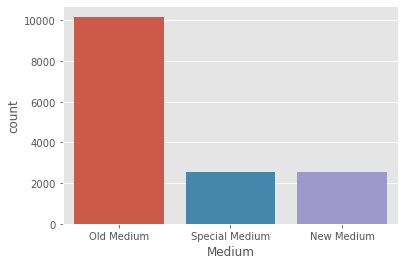

In [38]:
### Create a new variable based on the order method type as follows:

## - If order method is {Telephone, Fax, Mail, Sales visit} then the value is 'Old medium'
## - If order method is {E-mail, Web} then the value is "New medium"
## - If order method is {Special} then the value is "Special medium"

### After, create a count plot to see which medium is the most popular

mysales['Medium'] = mysales['Order method type'].map({'Telephone':'Old Medium',
                                 'Fax':'Old Medium',
                                 'Mail':'Old Medium',
                                 'Sales visit':'Old Medium',
                                 'E-mail':'New Medium',
                                 'Special':'Special Medium'})
sns.countplot(data = mysales,x = 'Medium')

In [34]:
# Let's creat a copy of sales first to use it for this exercise

mysales = sales.copy()

#### 3.3 Using `map()` to apply a user defined function on a variable

In [40]:
# Create a function that takes a number, and returns its double

def double_value(x):
    return 2*x

double_value(5)

10

In [42]:
# use the function to return the double of the Unit price
# for all sales in the sales data

sales['Unit price'].map(double_value)
sales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.4 Using `map()` to apply an anonymous function (lambda expression) on a variable

In the previous section, we have learned how to defined a Python function that has a name (e.g. double_value). Notice that the function we defined earlier in section 3.3 computes and expression based on input argument. 

In Python, anonymous function means that a function is without a name. As we already know that def keyword is used to define the normal functions and the lambda keyword is used to create anonymous functions. It has the following syntax:

`lambda arguments: expression`

Source: https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/


In [44]:
# To see how lambda expressions work, 
# we will first create a function that takes a number, 
# and returns its double, and then create it using lambda expressions

## Using Functions

sales['Unit price'].map(lambda x:2*x)

0        21.28
1          NaN
2        21.28
3        21.28
4          NaN
         ...  
17818      NaN
17819      NaN
17820      NaN
17821      NaN
17822      NaN
Name: Unit price, Length: 17823, dtype: float64

In [ ]:
# Using lambda expressions

# Lambda definition does not include a “return” statement, it always contains an expression which is returned. 
# We can also put a lambda definition anywhere a function is expected, 
# and we don’t have to assign it to a variable at all. 
# This is the simplicity of lambda functions.

# the input to the lambda expression (x) is the value coming from
# the sales['Unit price'], and the output is (2x). 

# notice here that lambda expressions are efficient especially 
# if you don't want to create a seperate function that has a name

# lambda expressions don't stay in Pyhton's working directory like a regular function or variable



#### <font color='blue'>  DIY-2: Mutating variables </font>

Find the top 5 largest differences between Revenue and Planned Revenue for each prodcut line over the different years.

In [46]:
sales.\
    assign(difference = sales['Revenue'] - sales['Planned revenue']).\
    groupby(['Year','Product line']).\
    agg({'difference':'max'}).\
    reset_index()


,Year,Product line,difference
0,2004,Camping Equipment,103694.28
1,2004,Golf Equipment,26719.64
2,2004,Mountaineering Equipment,NaN
3,2004,Outdoor Protection,52306.03
4,2005,Camping Equipment,151453.02
5,2005,Golf Equipment,49269.17
6,2005,Mountaineering Equipment,22373.40
7,2005,Outdoor Protection,33127.01
8,2006,Camping Equipment,285944.36
9,2006,Golf Equipment,72754.85


In [ ]:
# We'll set the style of plotting back to default
